In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:/Users/a/OneDrive/문서/카카오톡 받은 파일/abalone.csv")

In [71]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [72]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
    
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [73]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [74]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [75]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x2995a86cbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2995a878190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2995a86c8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x2995a878730>,
 'fliers': [<matplotlib.lines.Line2D at 0x2995a878a00>,
 'means': []}

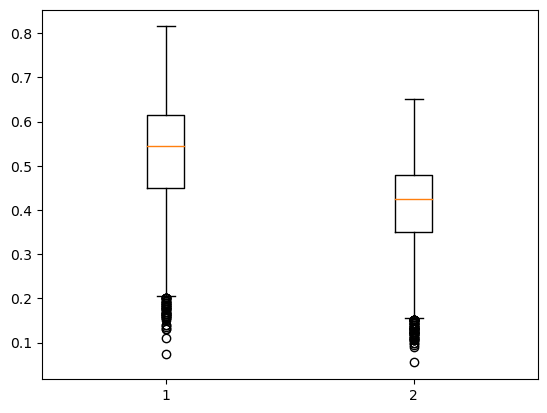

In [77]:
plt.boxplot([df["Length"], df["Diameter"]])

In [78]:
df = df[df.Length >0.215]
df = df[df.Diameter>0.15]
df.Length.min()

0.22

{'whiskers': [<matplotlib.lines.Line2D at 0x2995a8c6a30>,
 'caps': [<matplotlib.lines.Line2D at 0x2995a8c6fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2995a8c6730>,
 'medians': [<matplotlib.lines.Line2D at 0x2995a8d15b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2995a8d1880>,
 'means': []}

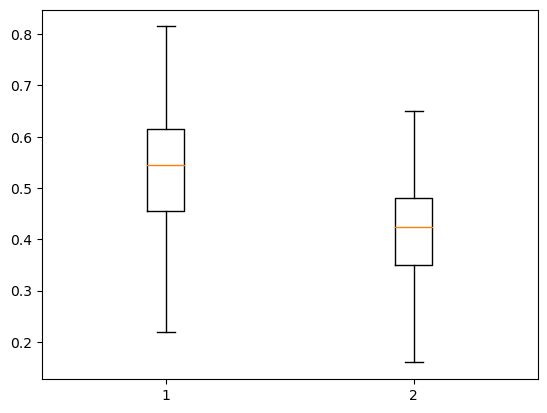

In [79]:
plt.boxplot([df["Length"], df["Diameter"]])

In [80]:
y = df['Rings']

X = df.drop('Rings',axis=1)



from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)



from sklearn.linear_model import LinearRegression



model = LinearRegression()

model.fit(X_train, y_train)



from sklearn.metrics import mean_squared_error



ly_preds = model.predict(X_test)

mse = np.sqrt(mean_squared_error(ly_preds, y_test))

print('평균제곱근오차', mse)

평균제곱근오차 2.372928668482447


In [86]:
df.groupby("Rings")["Shucked weight","Whole weight", "Shell weight"].mean()

C:\Users\a\AppData\Local\Temp\ipykernel_10092\13987374.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Rings")["Shucked weight","Whole weight", "Shell weight"].mean()


,Shucked weight,Whole weight,Shell weight
Rings,,,
3,0.031000,0.066500,0.017000
4,0.036224,0.085431,0.026224
5,0.069393,0.139811,0.040893
6,0.124569,0.276094,0.079138
7,0.183082,0.398296,0.111895
8,0.293773,0.640753,0.178609
9,0.387938,0.852013,0.236509
10,0.447217,1.008748,0.282976
11,0.503977,1.142559,0.319866


array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

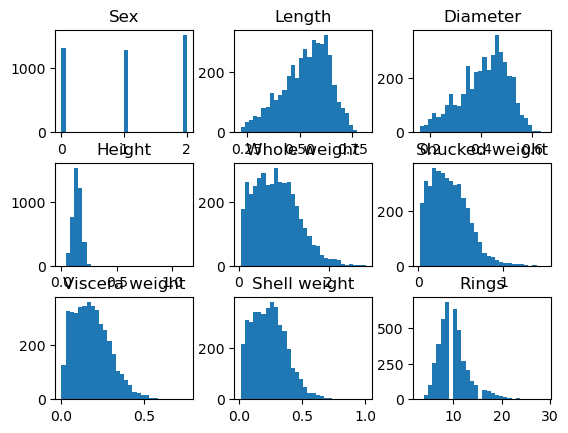

In [91]:
df.hist( grid=False,bins = 30)